<a href="https://colab.research.google.com/github/KiranGangoor0301/Hand_Written_DIgiit_Prediction-using-mnist_dataset/blob/main/HandWrittenPredDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import seaborn as sns
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
x_train=x_train.reshape(-1,28*28).astype('float64')/255
x_test=x_test.reshape(-1,28*28).astype('float64')/255

In [ ]:
model=keras.Sequential(
    [
        keras.Input(shape=(784)),
        layers.Dense(512,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(10)
    ]
)

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy'],
)


In [ ]:
model.fit(x_train,y_train,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
1875/1875 - 15s - loss: 0.1885 - accuracy: 0.9432 - 15s/epoch - 8ms/step
Epoch 2/5
1875/1875 - 14s - loss: 0.0801 - accuracy: 0.9755 - 14s/epoch - 7ms/step
Epoch 3/5
1875/1875 - 14s - loss: 0.0546 - accuracy: 0.9831 - 14s/epoch - 7ms/step
Epoch 4/5
1875/1875 - 16s - loss: 0.0405 - accuracy: 0.9866 - 16s/epoch - 9ms/step
Epoch 5/5
1875/1875 - 14s - loss: 0.0320 - accuracy: 0.9895 - 14s/epoch - 7ms/step


In [ ]:
model.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 1s - loss: 0.0857 - accuracy: 0.9740 - 868ms/epoch - 3ms/step


[0.08566047251224518, 0.9739999771118164]

In [ ]:
model.summary()
y_predicted=model.predict(x_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step


In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted ]

In [ ]:
cm=tf.math.confusion_matrix(
    y_test,
    y_predicted_labels
)

Text(95.72222222222221, 0.5, 'Original')

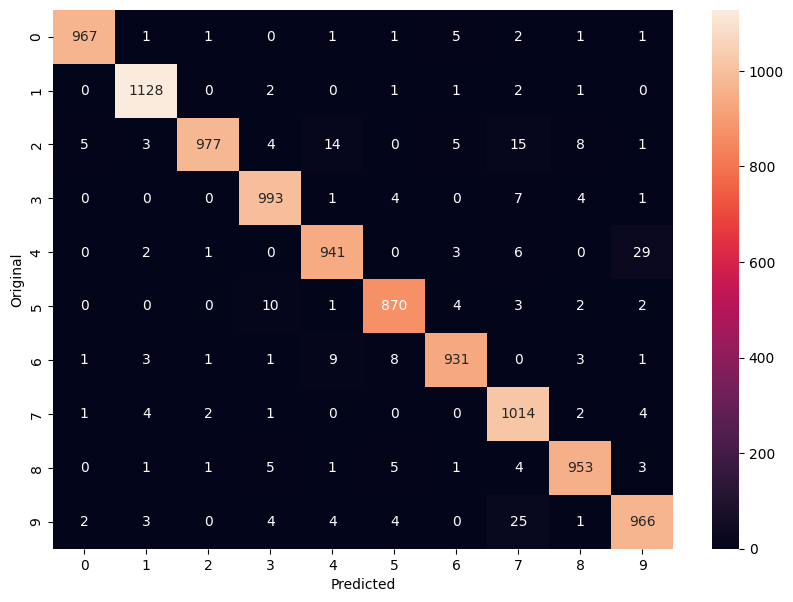

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Original')

In [ ]:
prediction=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction[0]

array([ -6.951002  ,   0.801023  ,  -0.06384525,   2.7065413 ,
        -8.061065  ,  -4.3731723 , -15.570483  ,  18.01052   ,
        -5.4575577 ,   2.5109167 ], dtype=float32)

In [ ]:
y_predicted_labels[0]

7

In [ ]:
y_test[0]

7